In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing the warnings module for handling warning messages
import warnings
# Ignoring warning messages to prevent interruptions during code execution
warnings.filterwarnings("ignore")
df = pd.read_excel(r"C:\Users\Meghana\Desktop\mini project dataset\linkedin\final_data.xlsx")
df.head()
# Remove rows with null values
df.dropna(inplace=True)
# Reset the index of the DataFrame
df.reset_index(inplace=True, drop=True)
# Calculate the number of null values in each column
null_counts = df.isnull().sum()
# Print the results
print(null_counts)

job_title         0
company           0
job_location      0
job_link          0
first_seen        0
search_city       0
search_country    0
job level         0
job_type          0
job_summary       0
job_skills        0
date_posted       0
dtype: int64


In [2]:
duplicates_all = df[df.duplicated()]
df = df.drop_duplicates()
print("Remaining duplicates:", df.duplicated().sum())
df.head()

Remaining duplicates: 0


,job_title,company,job_location,job_link,first_seen,search_city,search_country,job level,job_type,job_summary,job_skills,date_posted
0,Sr. Software Engineer – Distributed Graph Stor...,CrowdStrike,"Nova Scotia, Canada",https://ca.linkedin.com/jobs/view/sr-software-...,12/25/23,Halifax,Canada,Mid senior,Remote,#WeAreCrowdStrike and our mission is to stop b...,"['Go', ' Java', ' Python', ' Git', ' Cassandra...",2024-02-14
1,Java Software Engineer (Var 28),Modis,"Newark, DE",https://www.linkedin.com/jobs/view/java-softwa...,12/25/23,Aberdeen,United States,Mid senior,Onsite,J2EE Developer - JAVA / Full Stack\nContract:\...,"['J2EE', ' Java', ' Struts', ' Spring', ' Spri...",2024-05-13
2,Senior Software Engineer (Backend) (Var 65),SimplyAnalytics,"Toronto, Ontario, Canada",https://ca.linkedin.com/jobs/view/senior-softw...,12/25/23,Etobicoke,Canada,Mid senior,Remote,The Company\nSimplyAnalytics is a powerful spa...,"['PHP', ' Python', ' Dask', ' Dagster', ' Post...",2024-03-08
3,Senior Software Engineer (Var 46),"Changing Technologies, Inc.","Johnston, IA",https://www.linkedin.com/jobs/view/senior-soft...,12/25/23,West Des Moines,United States,Mid senior,Onsite,Job Description\nJob Title - Senior Software E...,"['Java', ' React', ' Springboot', ' AWS', ' No...",2022-04-19
4,Senior Software Engineer with Security Clearan...,ClearanceJobs,"Kirtland, NM",https://www.linkedin.com/jobs/view/senior-soft...,12/25/23,Shiprock,United States,Mid senior,Onsite,LinQuest is seeking a Software Engineer/Develo...,"['C++', ' Python', ' MATLAB', ' Visual Basic',...",2021-10-09


In [3]:
# Split the job_location column by commas
df[['job_city', 'job_country']] = df['job_location'].str.rsplit(',', n=1, expand=True)

# Clean up any extra spaces
df['job_city'] = df['job_city'].str.strip()
df['job_country'] = df['job_country'].str.strip()

# Display the first few rows with city and country columns
print(df[['company', 'job_city', 'job_country']].head())
df.drop(columns=['first_seen'], inplace=True)

                       company          job_city job_country
0                  CrowdStrike       Nova Scotia      Canada
1                        Modis            Newark          DE
2              SimplyAnalytics  Toronto, Ontario      Canada
3  Changing Technologies, Inc.          Johnston          IA
4                ClearanceJobs          Kirtland          NM


In [4]:
# Copy the city value to country where country is null
df['job_country'] = df['job_country'].fillna(df['job_city'])
null_values_count = df['job_country'].isnull().sum()
print("\nNumber of null values in 'country' column:", null_values_count)
df.shape[0]


Number of null values in 'country' column: 0


89251

In [5]:
df.drop('job_location', axis=1, inplace=True)

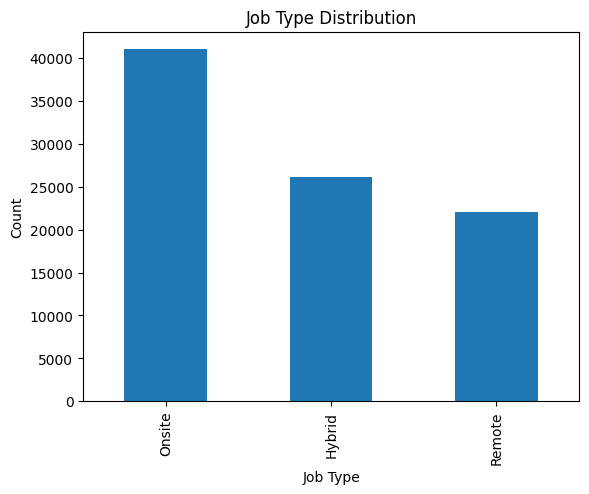

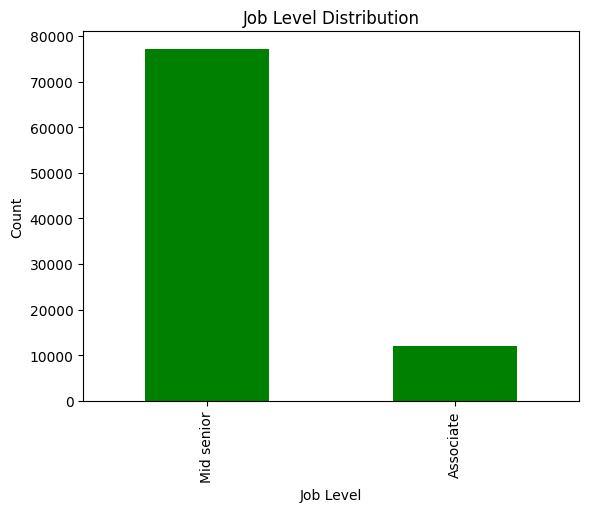

In [6]:
import matplotlib.pyplot as plt

# Plot job type distribution
df['job_type'].value_counts().plot(kind='bar', title='Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

# Plot job level distribution
df['job level'].value_counts().plot(kind='bar', title='Job Level Distribution', color='green')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.show()


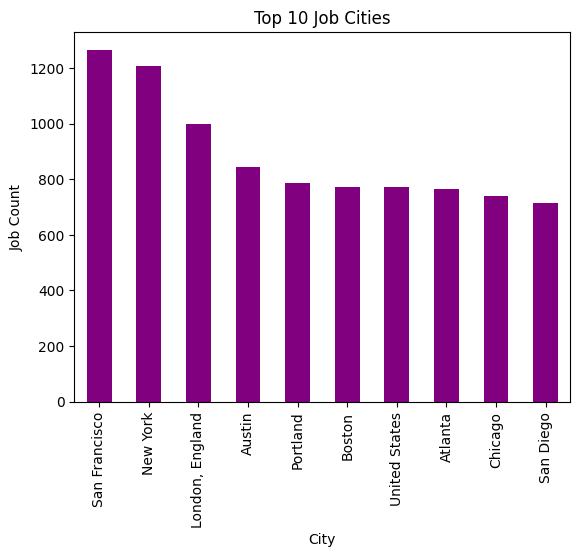

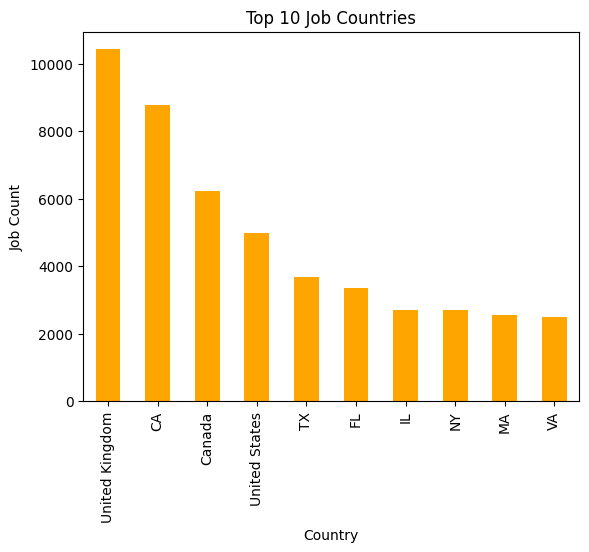

In [7]:
# Plot job city distribution
df['job_city'].value_counts().head(10).plot(kind='bar', title='Top 10 Job Cities', color='purple')
plt.xlabel('City')
plt.ylabel('Job Count')
plt.show()

# Plot job country distribution
df['job_country'].value_counts().head(10).plot(kind='bar', title='Top 10 Job Countries', color='orange')
plt.xlabel('Country')
plt.ylabel('Job Count')
plt.show()


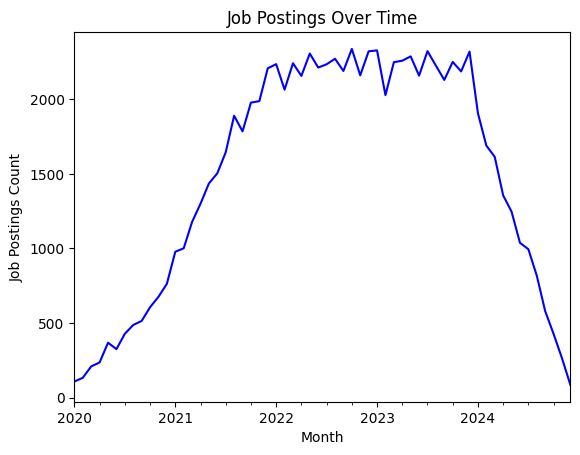

In [8]:
# Convert 'date_posted' to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Group by month and count the number of postings
monthly_postings = df.groupby(df['date_posted'].dt.to_period('M')).size()

# Plot the trend of job postings over time
monthly_postings.plot(kind='line', title='Job Postings Over Time', color='blue')
plt.xlabel('Month')
plt.ylabel('Job Postings Count')
plt.show()


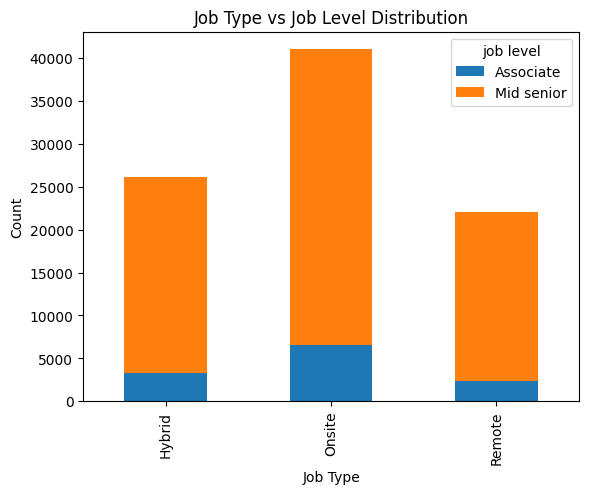

In [9]:
# Create a crosstab between job type and job level
job_type_level = pd.crosstab(df['job_type'], df['job level'])

# Plot the distribution
job_type_level.plot(kind='bar', stacked=True, title='Job Type vs Job Level Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()


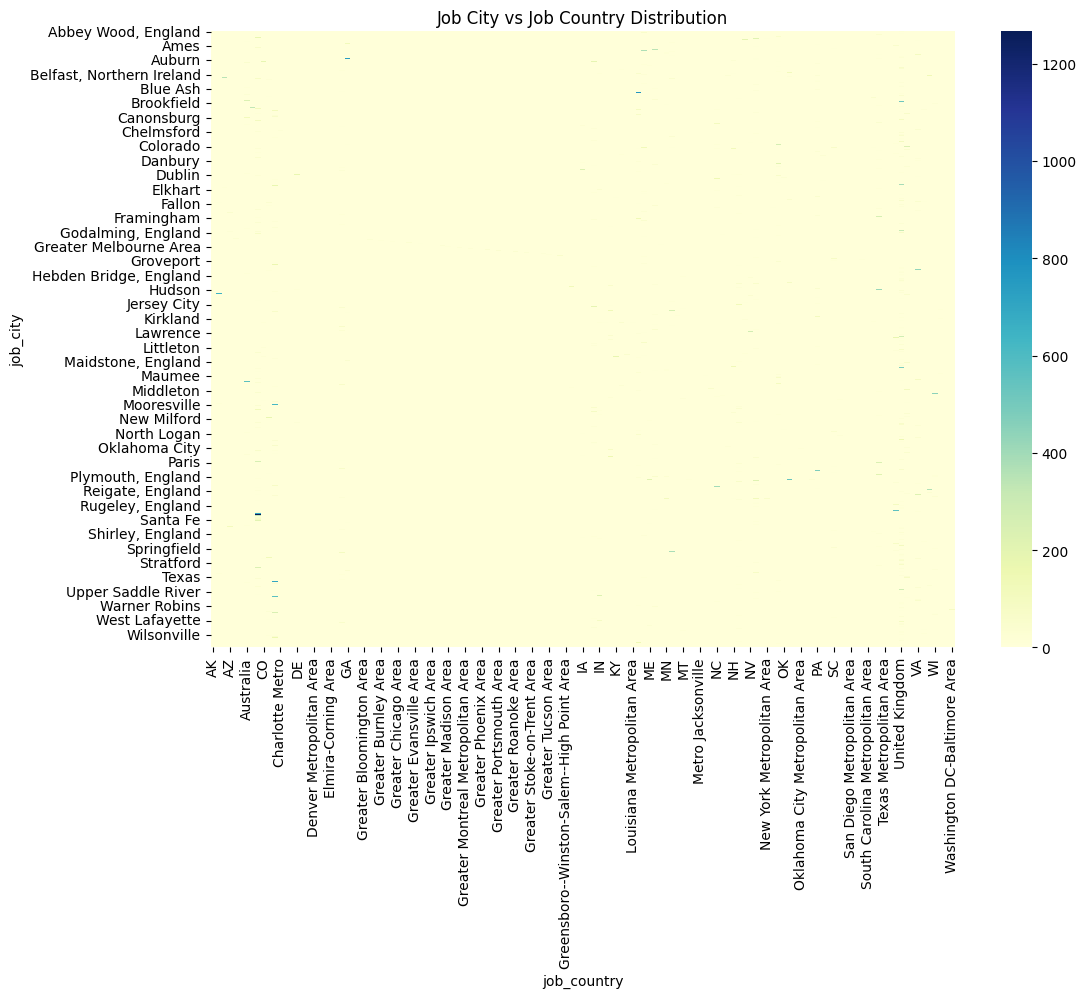

In [10]:
# Create a crosstab between job_city and job_country to see city vs country distribution
city_country_distribution = pd.crosstab(df['job_city'], df['job_country'])

# Plot the heatmap for city vs country distribution
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(city_country_distribution, cmap='YlGnBu', annot=False)
plt.title('Job City vs Job Country Distribution')
plt.show()

In [11]:
#K MEANS ALGORITHM

In [12]:

df.head()

,job_title,company,job_link,search_city,search_country,job level,job_type,job_summary,job_skills,date_posted,job_city,job_country
0,Sr. Software Engineer – Distributed Graph Stor...,CrowdStrike,https://ca.linkedin.com/jobs/view/sr-software-...,Halifax,Canada,Mid senior,Remote,#WeAreCrowdStrike and our mission is to stop b...,"['Go', ' Java', ' Python', ' Git', ' Cassandra...",2024-02-14,Nova Scotia,Canada
1,Java Software Engineer (Var 28),Modis,https://www.linkedin.com/jobs/view/java-softwa...,Aberdeen,United States,Mid senior,Onsite,J2EE Developer - JAVA / Full Stack\nContract:\...,"['J2EE', ' Java', ' Struts', ' Spring', ' Spri...",2024-05-13,Newark,DE
2,Senior Software Engineer (Backend) (Var 65),SimplyAnalytics,https://ca.linkedin.com/jobs/view/senior-softw...,Etobicoke,Canada,Mid senior,Remote,The Company\nSimplyAnalytics is a powerful spa...,"['PHP', ' Python', ' Dask', ' Dagster', ' Post...",2024-03-08,"Toronto, Ontario",Canada
3,Senior Software Engineer (Var 46),"Changing Technologies, Inc.",https://www.linkedin.com/jobs/view/senior-soft...,West Des Moines,United States,Mid senior,Onsite,Job Description\nJob Title - Senior Software E...,"['Java', ' React', ' Springboot', ' AWS', ' No...",2022-04-19,Johnston,IA
4,Senior Software Engineer with Security Clearan...,ClearanceJobs,https://www.linkedin.com/jobs/view/senior-soft...,Shiprock,United States,Mid senior,Onsite,LinQuest is seeking a Software Engineer/Develo...,"['C++', ' Python', ' MATLAB', ' Visual Basic',...",2021-10-09,Kirtland,NM


In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Preprocessing pipeline: OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['job level', 'job_type', 'job_country', 'company'])
    ]
)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)

# Create a pipeline to preprocess the data and apply KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the model
pipeline.fit(df)

# Predict the clusters for each job
df['cluster'] = pipeline.predict(df)

# Save the dataframe with cluster labels to a CSV file
output_file = r'C:\Users\Meghana\Desktop\MCA Final Demo\LinkedIn\clustered_jobs.csv'
df[['job level', 'job_country', 'company', 'cluster']].to_csv(output_file, index=False)

# Display the dataframe with the cluster labels
print(df)


                                               job_title  \
0      Sr. Software Engineer – Distributed Graph Stor...   
1                        Java Software Engineer (Var 28)   
2            Senior Software Engineer (Backend) (Var 65)   
3                      Senior Software Engineer (Var 46)   
4      Senior Software Engineer with Security Clearan...   
...                                                  ...   
89249  Software Engineer 3 - 6D6-Real Time Software E...   
89250                      Real Time Software Engineer 3   
89251  6J7BI4-Software Engineer 4 - 6D6-Real Time Sof...   
89252  6J7BI4-Software Engineer 4 - 6D6-Real Time Sof...   
89253  6J7BI3-Software Engineer 3 - 6D6-Real Time Sof...   

                                                 company  \
0                                            CrowdStrike   
1                                                  Modis   
2                                        SimplyAnalytics   
3                            Changing T

In [14]:
# Ensure 'company' exists in the original dataframe
if 'company' in df.columns and 'cluster' in df.columns:
    # Create a new DataFrame with company and cluster
    company_cluster_df = df[['company', 'cluster']]
    print(company_cluster_df.head())
else:
    print("Error: 'company' or 'cluster' column is missing from the DataFrame.")


                       company  cluster
0                  CrowdStrike        3
1                        Modis        1
2              SimplyAnalytics        3
3  Changing Technologies, Inc.        1
4                ClearanceJobs        1


In [15]:
company_cluster_df.head(10)

,company,cluster
0,CrowdStrike,3
1,Modis,1
2,SimplyAnalytics,3
3,"Changing Technologies, Inc.",1
4,ClearanceJobs,1
5,Genesys,0
6,Walmart,1
7,IP Recruiter Group,3
8,LivePerson,3
9,SEACORP,1


In [16]:
# Ensure 'cluster' column exists in the DataFrame
if 'cluster' in company_cluster_df.columns:
    # Filter rows where cluster is 2
    cluster_2_df = company_cluster_df[company_cluster_df['cluster'] == 2]
    
    # Display the filtered rows
    print(cluster_2_df)
else:
    print("Error: 'cluster' column is missing from the DataFrame.")


                                                company  cluster
10     Los Angeles County Department of Human Resources        2
15                                               Abbott        2
21                                             Turnitin        2
27                                              Stryker        2
46                                   IP Recruiter Group        2
...                                                 ...      ...
89229                                           Verizon        2
89230                                           Verizon        2
89231                                    PRI Technology        2
89232                   Boeing Intelligence & Analytics        2
89233                                           Verizon        2

[12149 rows x 2 columns]


In [17]:
from collections import Counter
import pandas as pd

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Split 'job_skills' into individual skills and clean up the list
if 'job_skills' in df.columns:
    df['skills_list'] = df['job_skills'].str.split(r'[,\n;]+').apply(lambda x: [skill.strip() for skill in x if skill.strip()])

    # Count the frequency of each skill
    all_skills = [skill for sublist in df['skills_list'].dropna() for skill in sublist]
    skill_counts = Counter(all_skills)

    # Total most common skills (top 10)
    most_common_skills = skill_counts.most_common(10)
    total_most_common_skills = len(most_common_skills)

    # Display the first 6 unique skills and their counts
    unique_skills_count = len(skill_counts)

    # Create a CSV file with the job title, company, job skills, and the processed skills list
    output_file = 'processed_job_skills.csv'
    df[['job_title', 'company', 'job_skills', 'skills_list']].to_csv(output_file, index=False)

    # No print statements (everything is handled quietly)
else:
    pass  # Skips the processing if 'job_skills' column is not found


In [18]:
from collections import Counter

# Split 'job_skills' into individual skills and clean up
all_skills = [skill.strip() for sublist in df['job_skills'].dropna().str.split(r'[,\n;]+') for skill in sublist]
skill_counts = Counter(all_skills)

# Display the most common job skills
print("\nMost common job skills:")
for skill, count in skill_counts.most_common(10):
    print(f"{skill}: {count}")



Most common job skills:
' Python': 27986
' AWS': 22942
' SQL': 20698
' JavaScript': 20240
' Java': 18711
' Agile': 16457
' Kubernetes': 14824
' Git': 14481
' Docker': 14207
' React': 12922


In [19]:
# Create a new DataFrame with company and skills_list
company_skills_df = df[['company', 'skills_list']].copy()

# Save the new DataFrame to a CSV file
output_file_skills = 'company_skills.csv'
company_skills_df.to_csv(output_file_skills, index=False)

print(f"Company and skills DataFrame successfully saved to {output_file_skills}")


Company and skills DataFrame successfully saved to company_skills.csv


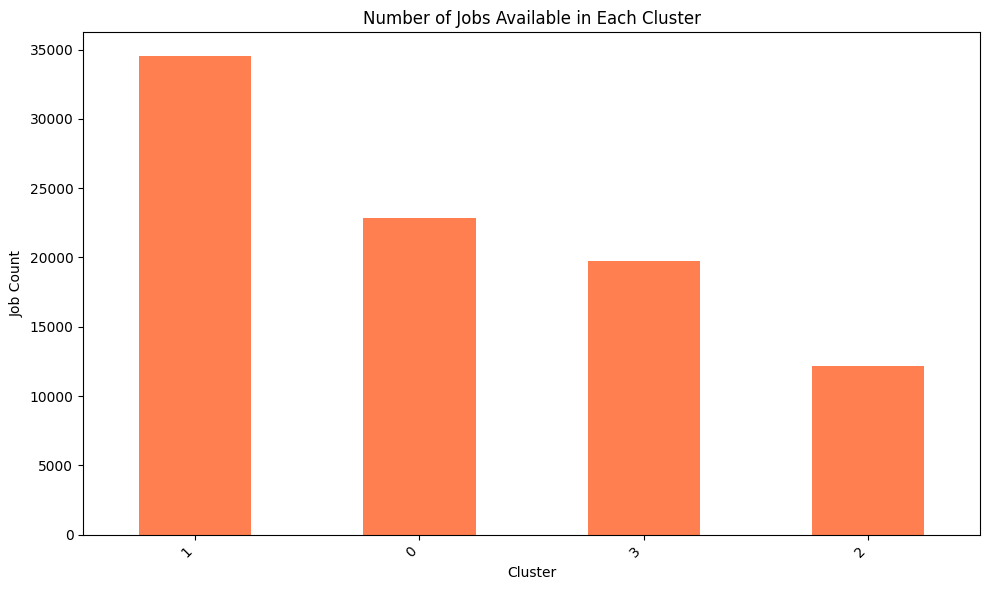

In [20]:
import matplotlib.pyplot as plt

# Assuming the DataFrame has a 'cluster' column representing job clusters
# Replace 'cluster' with the actual column name if it's different in your dataset

# Group the data by 'cluster' and count the number of job entries in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the number of jobs available in each cluster
cluster_counts.plot(kind='bar', figsize=(10, 6), color='coral', title='Number of Jobs Available in Each Cluster')

plt.xlabel('Cluster')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


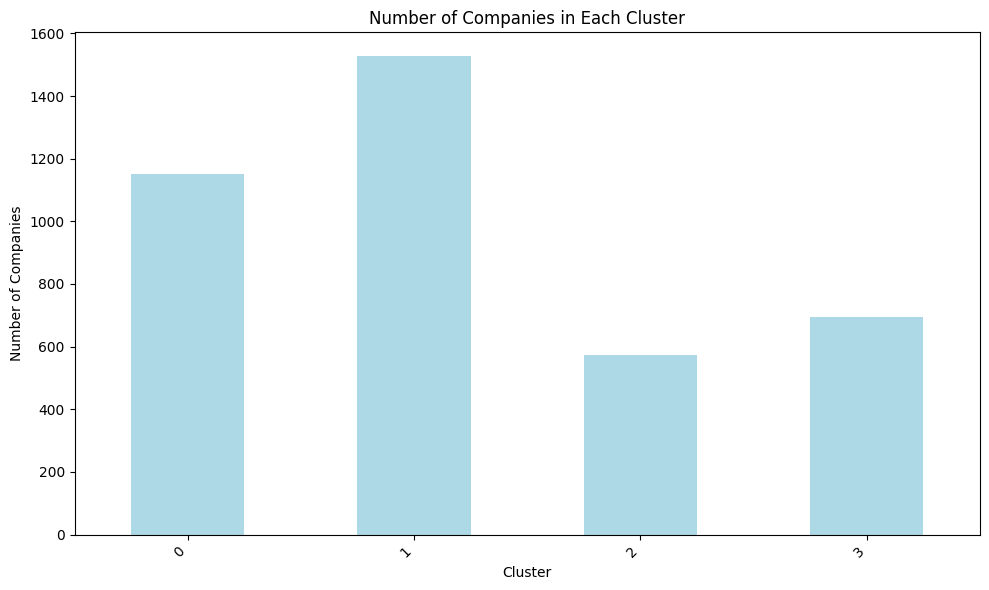

In [21]:
import matplotlib.pyplot as plt

# Assuming the DataFrame has a 'cluster' column representing job clusters
# And 'company' column representing the company name

# Group the data by 'cluster' and count the number of unique companies in each cluster
company_counts_in_cluster = df.groupby('cluster')['company'].nunique()

# Plot the number of companies in each cluster
company_counts_in_cluster.plot(kind='bar', figsize=(10, 6), color='lightblue', title='Number of Companies in Each Cluster')

plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()



Most common job skills:
' Python': 27986
' AWS': 22942
' SQL': 20698
' JavaScript': 20240
' Java': 18711
' Agile': 16457
' Kubernetes': 14824
' Git': 14481
' Docker': 14207
' React': 12922


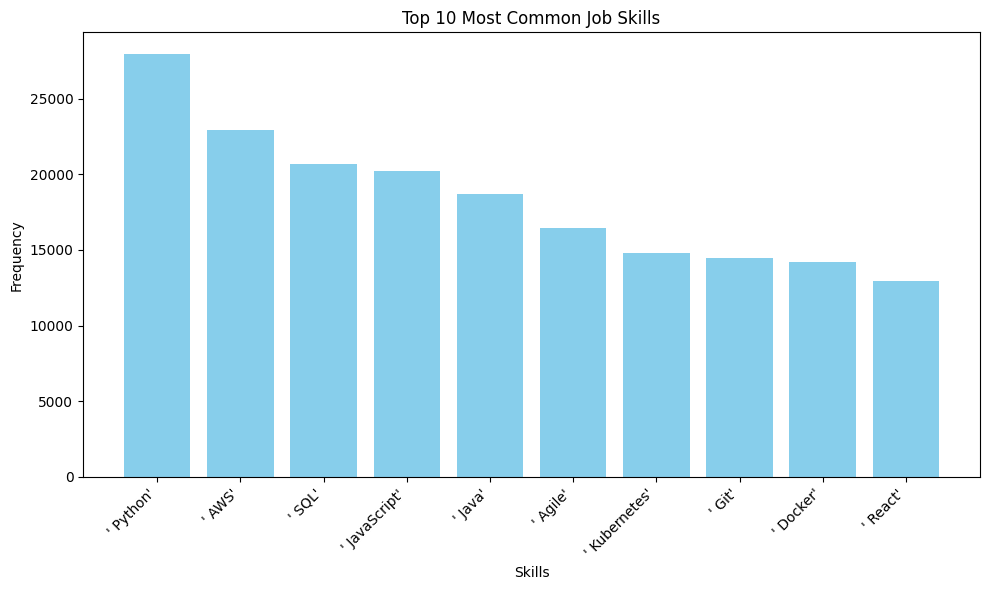

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

# Split 'job_skills' into individual skills and clean up
all_skills = [skill.strip() for sublist in df['job_skills'].dropna().str.split(r'[,\n;]+') for skill in sublist]
skill_counts = Counter(all_skills)

# Display the most common job skills
print("\nMost common job skills:")
for skill, count in skill_counts.most_common(10):
    print(f"{skill}: {count}")

# Plot the most common job skills
common_skills, counts = zip(*skill_counts.most_common(10))  # Unzips the skills and their counts

plt.figure(figsize=(10, 6))
plt.bar(common_skills, counts, color='skyblue')
plt.title('Top 10 Most Common Job Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

# Assuming 'df' is your DataFrame and it has the columns 'company', 'job_level', and 'job_skills'

# 1. Preprocess 'company' using Label Encoding
le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['company'].fillna('Unknown'))

# 2. Preprocess 'job_level' as a numerical feature
df['job level'] = df['job level'].fillna('Unknown')  # Fill missing job levels with 'Unknown'

# Define more comprehensive job level encoding
job_level_mapping = {
    'junior': 1,
    'mid': 2,
    'senior': 3,
    'mid senior': 4,  # Handling variations like 'mid senior'
    'associate': 5,   # Handling other variations like 'associate'
    'unknown': 0
}

# Apply job level encoding based on the mapping
df['job_level_encoded'] = df['job level'].str.lower().map(job_level_mapping).fillna(0).astype(int)

# 3. Preprocess 'job_skills' using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
skills_tfidf = tfidf_vectorizer.fit_transform(df['job_skills'].fillna(''))

# 4. Combine features for clustering
numerical_features = csr_matrix(df[['company_encoded', 'job_level_encoded']].fillna(0).values)
X = hstack([numerical_features, skills_tfidf])

# 5. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set to 4 clusters
df['cluster'] = kmeans.fit_predict(X)

# 6. Assign meaningful names to clusters
cluster_names = {
    0: 'High In-Demand',
    1: 'Moderate In-Demand',
    2: 'Low In-Demand',
    3: 'Emerging In-Demand'
}
df['cluster_name'] = df['cluster'].map(cluster_names)

# 7. Save the clustered data to a CSV file
output_file = r"C:\Users\Meghana\Desktop\MCA Final Demo\LinkedIn\company_cluster.csv"
df[['company', 'job level', 'job_skills', 'cluster', 'cluster_name']].to_csv(output_file, index=False)

print(f"Clustered data saved to: {output_file}")


Clustered data saved to: C:\Users\Meghana\Desktop\MCA Final Demo\LinkedIn\company_cluster.csv


In [24]:
df.head()

,job_title,company,job_link,search_city,search_country,job level,job_type,job_summary,job_skills,date_posted,job_city,job_country,cluster,skills_list,company_encoded,job_level_encoded,cluster_name
0,Sr. Software Engineer – Distributed Graph Stor...,CrowdStrike,https://ca.linkedin.com/jobs/view/sr-software-...,Halifax,Canada,Mid senior,Remote,#WeAreCrowdStrike and our mission is to stop b...,"['Go', ' Java', ' Python', ' Git', ' Cassandra...",2024-02-14,Nova Scotia,Canada,3,"[['Go', ' Java', ' Python', ' Git', ' Cassandr...",747,4,Emerging In-Demand
1,Java Software Engineer (Var 28),Modis,https://www.linkedin.com/jobs/view/java-softwa...,Aberdeen,United States,Mid senior,Onsite,J2EE Developer - JAVA / Full Stack\nContract:\...,"['J2EE', ' Java', ' Struts', ' Spring', ' Spri...",2024-05-13,Newark,DE,2,"[['J2EE', ' Java', ' Struts', ' Spring', ' Spr...",1885,4,Low In-Demand
2,Senior Software Engineer (Backend) (Var 65),SimplyAnalytics,https://ca.linkedin.com/jobs/view/senior-softw...,Etobicoke,Canada,Mid senior,Remote,The Company\nSimplyAnalytics is a powerful spa...,"['PHP', ' Python', ' Dask', ' Dagster', ' Post...",2024-03-08,"Toronto, Ontario",Canada,0,"[['PHP', ' Python', ' Dask', ' Dagster', ' Pos...",2619,4,High In-Demand
3,Senior Software Engineer (Var 46),"Changing Technologies, Inc.",https://www.linkedin.com/jobs/view/senior-soft...,West Des Moines,United States,Mid senior,Onsite,Job Description\nJob Title - Senior Software E...,"['Java', ' React', ' Springboot', ' AWS', ' No...",2022-04-19,Johnston,IA,3,"[['Java', ' React', ' Springboot', ' AWS', ' N...",599,4,Emerging In-Demand
4,Senior Software Engineer with Security Clearan...,ClearanceJobs,https://www.linkedin.com/jobs/view/senior-soft...,Shiprock,United States,Mid senior,Onsite,LinQuest is seeking a Software Engineer/Develo...,"['C++', ' Python', ' MATLAB', ' Visual Basic',...",2021-10-09,Kirtland,NM,3,"[['C++', ' Python', ' MATLAB', ' Visual Basic'...",628,4,Emerging In-Demand


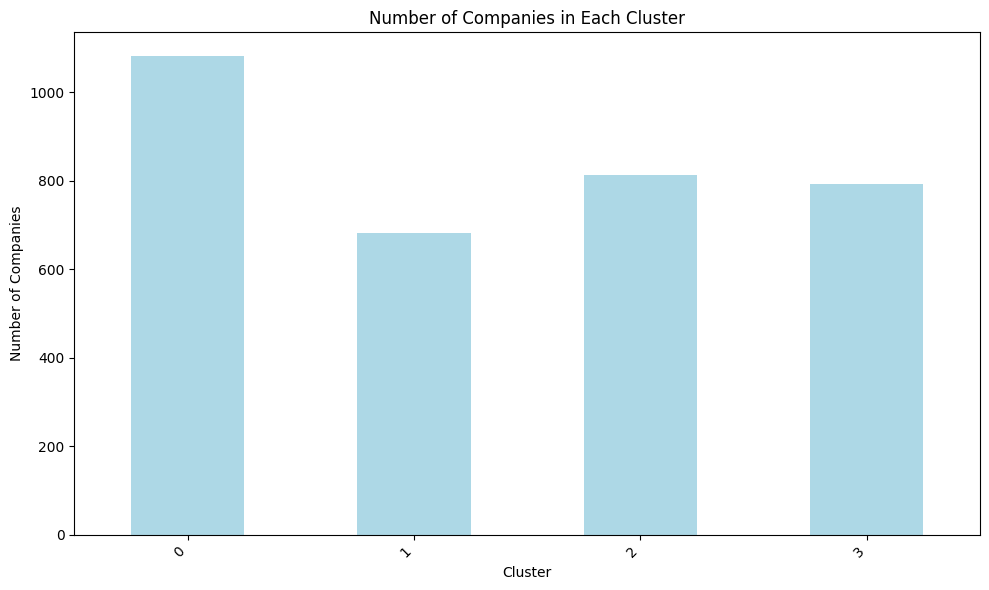

In [25]:
import matplotlib.pyplot as plt

# Assuming the DataFrame has a 'cluster' column representing job clusters
# And 'company' column representing the company name

# Group the data by 'cluster' and count the number of unique companies in each cluster
company_counts_in_cluster = df.groupby('cluster')['company'].nunique()

# Plot the number of companies in each cluster
company_counts_in_cluster.plot(kind='bar', figsize=(10, 6), color='lightblue', title='Number of Companies in Each Cluster')

plt.xlabel('Cluster')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

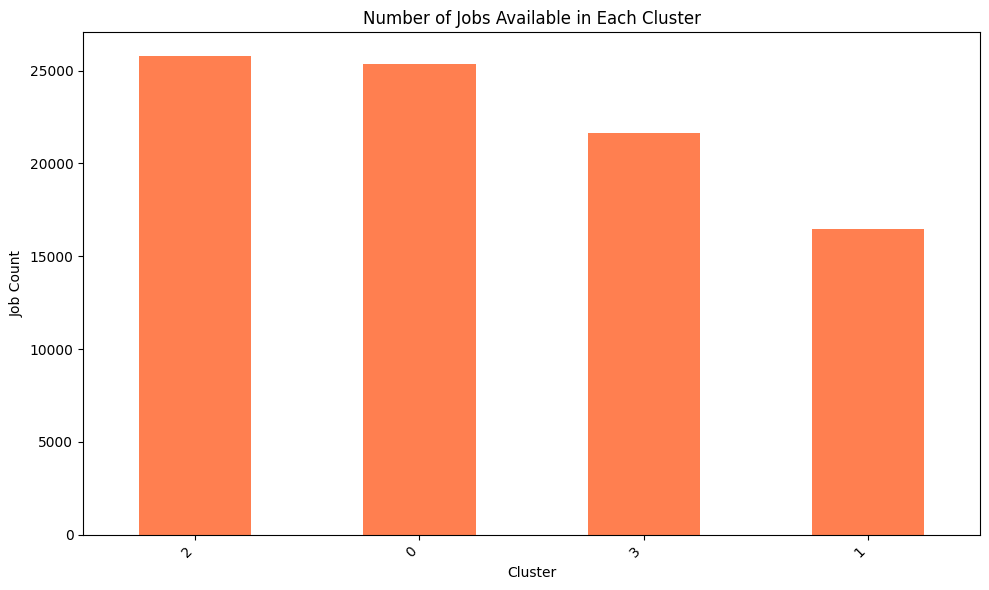

In [26]:
import matplotlib.pyplot as plt

# Assuming the DataFrame has a 'cluster' column representing job clusters
# Replace 'cluster' with the actual column name if it's different in your dataset

# Group the data by 'cluster' and count the number of job entries in each cluster
cluster_counts = df['cluster'].value_counts()

# Plot the number of jobs available in each cluster
cluster_counts.plot(kind='bar', figsize=(10, 6), color='coral', title='Number of Jobs Available in Each Cluster')

plt.xlabel('Cluster')
plt.ylabel('Job Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()
